<a href="https://colab.research.google.com/github/sandhrabijoy/Time-series/blob/main/Bitcoin_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
pip install pandas-datareader

In [106]:
import pandas_datareader.data as web
import datetime

In [107]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [108]:
pip install yfinance

In [109]:
import yfinance as yf

In [166]:
import datetime
start_date=datetime.datetime(2018, 1,1)
end_date=datetime.datetime(2020,12,2)
btc=yf.download('BTC-USD',start_date,end_date)['Close']
print(btc.head())

[*********************100%***********************]  1 of 1 completed

Ticker                          BTC-USD
Date                                   
2018-01-01 00:00:00+00:00  13657.200195
2018-01-02 00:00:00+00:00  14982.099609
2018-01-03 00:00:00+00:00  15201.000000
2018-01-04 00:00:00+00:00  15599.200195
2018-01-05 00:00:00+00:00  17429.500000


In [167]:
btc.to_csv("btc.csv")
print(btc.head())

Ticker                          BTC-USD
Date                                   
2018-01-01 00:00:00+00:00  13657.200195
2018-01-02 00:00:00+00:00  14982.099609
2018-01-03 00:00:00+00:00  15201.000000
2018-01-04 00:00:00+00:00  15599.200195
2018-01-05 00:00:00+00:00  17429.500000


In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
btc.columns

Index(['BTC-USD'], dtype='object', name='Ticker')

In [170]:
btc.index

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-02 00:00:00+00:00',
               '2018-01-03 00:00:00+00:00', '2018-01-04 00:00:00+00:00',
               '2018-01-05 00:00:00+00:00', '2018-01-06 00:00:00+00:00',
               '2018-01-07 00:00:00+00:00', '2018-01-08 00:00:00+00:00',
               '2018-01-09 00:00:00+00:00', '2018-01-10 00:00:00+00:00',
               ...
               '2020-11-22 00:00:00+00:00', '2020-11-23 00:00:00+00:00',
               '2020-11-24 00:00:00+00:00', '2020-11-25 00:00:00+00:00',
               '2020-11-26 00:00:00+00:00', '2020-11-27 00:00:00+00:00',
               '2020-11-28 00:00:00+00:00', '2020-11-29 00:00:00+00:00',
               '2020-11-30 00:00:00+00:00', '2020-12-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1066, freq=None)

In [171]:
btc.reset_index(inplace=True)
btc.head()

Ticker,Date,BTC-USD
0,2018-01-01 00:00:00+00:00,13657.200195
1,2018-01-02 00:00:00+00:00,14982.099609
2,2018-01-03 00:00:00+00:00,15201.000000
3,2018-01-04 00:00:00+00:00,15599.200195
4,2018-01-05 00:00:00+00:00,17429.500000


In [172]:
btc.columns


Index(['Date', 'BTC-USD'], dtype='object', name='Ticker')

In [173]:
btc['Date'] = pd.to_datetime(btc['Date'],format ='%Y-%m-%d')
print(btc.head())

Ticker                      Date       BTC-USD
0      2018-01-01 00:00:00+00:00  13657.200195
1      2018-01-02 00:00:00+00:00  14982.099609
2      2018-01-03 00:00:00+00:00  15201.000000
3      2018-01-04 00:00:00+00:00  15599.200195
4      2018-01-05 00:00:00+00:00  17429.500000


In [174]:
btc['Date'] = btc['Date'].dt.strftime('%Y-%m-%d')



In [175]:
btc.head()

Ticker,Date,BTC-USD
0,2018-01-01,13657.200195
1,2018-01-02,14982.099609
2,2018-01-03,15201.000000
3,2018-01-04,15599.200195
4,2018-01-05,17429.500000


In [176]:
sns.set()

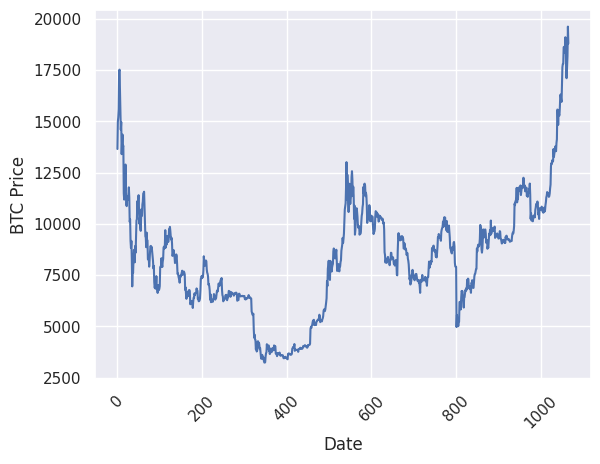

In [177]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['BTC-USD'])

splitting data to train test split

In [178]:
btc['Date'] = pd.to_datetime(btc['Date'], format='%Y-%m-%d')
btc.head()

Ticker,Date,BTC-USD
0,2018-01-01,13657.200195
1,2018-01-02,14982.099609
2,2018-01-03,15201.000000
3,2018-01-04,15599.200195
4,2018-01-05,17429.500000


In [179]:
btc.set_index('Date', inplace=True)

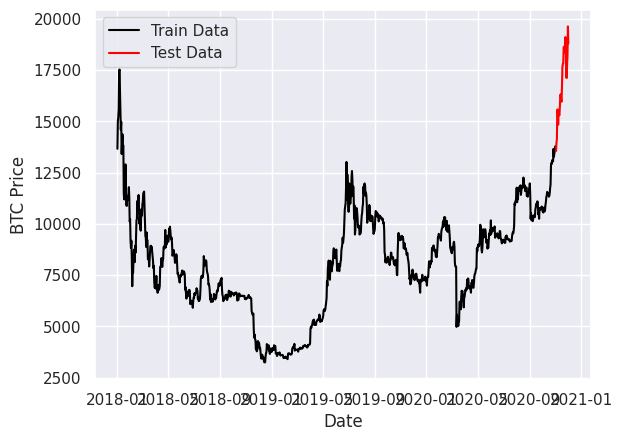

In [180]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format="%Y-%m-%d")]
test= btc[btc.index > pd.to_datetime("2020-11-01",format="%Y-%m-%d")]

plt.plot(train.index, train['BTC-USD'], color="black", label="Train Data")
plt.plot(test.index, test['BTC-USD'], color="red", label="Test Data")


plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.legend()

plt.show()


Autoregressive Moving Average Model(ARMA)

In [181]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [182]:
y= train['BTC-USD']

In [183]:
ARMAmodel = SARIMAX(y,order=(1,0,1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [184]:
ARMAmodel=ARMAmodel.fit()

In [185]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df= y_pred.conf_int(alpha= 0.05)
y_pred_df["Predictions"]= ARMAmodel.predict(start = y_pred_df.index[0],end=y_pred_df.index[-1])
y_pred_df.index= test.index
y_pred_out = y_pred_df["Predictions"]

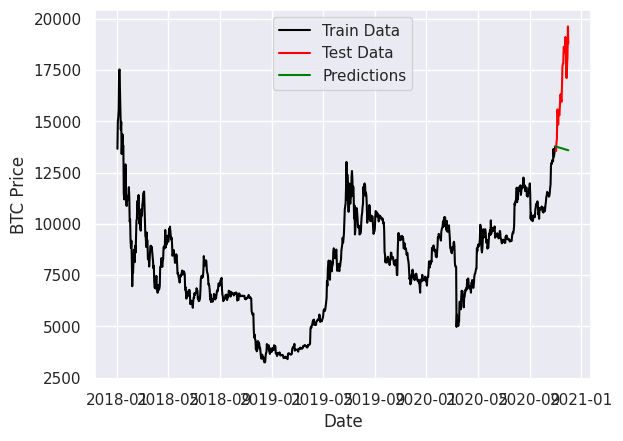

In [186]:
plt.plot(train.index, train['BTC-USD'], color="black", label="Train Data")
plt.plot(test.index, test['BTC-USD'], color="red", label="Test Data")
plt.plot(y_pred_out, color="green", label="Predictions")

plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.legend()

plt.show()

Root Mean Squared Error

In [187]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse=np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  3562.1356482324695


AutoRegressive Integrated Moving Average(ARIMA)

In [188]:
from statsmodels.tsa.arima.model import ARIMA

In [189]:
ARIMAmodel=ARIMA(y,order=(2,2,2))
ARIMAmodel=ARIMAmodel.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


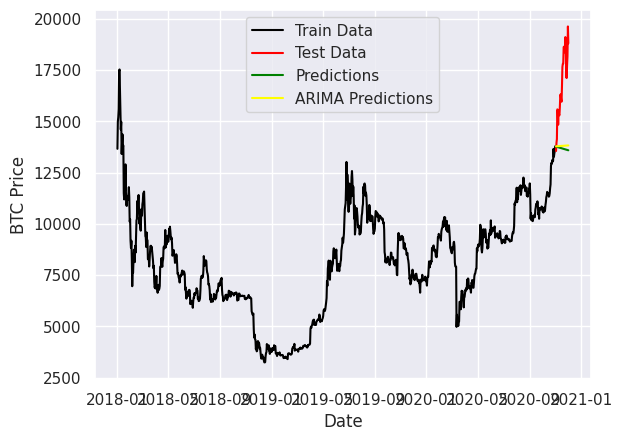

In [190]:
y_pred= ARIMAmodel.get_forecast(len(test.index))
y_pred_df=y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"]=ARIMAmodel.predict(start = y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index=test.index
y_pred_out1=y_pred_df["Predictions"]
plt.plot(train.index, train['BTC-USD'], color="black", label="Train Data")
plt.plot(test.index, test['BTC-USD'], color="red", label="Test Data")
plt.plot(y_pred_out, color="green", label="Predictions")
plt.plot(y_pred_out1, color="Yellow", label='ARIMA Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


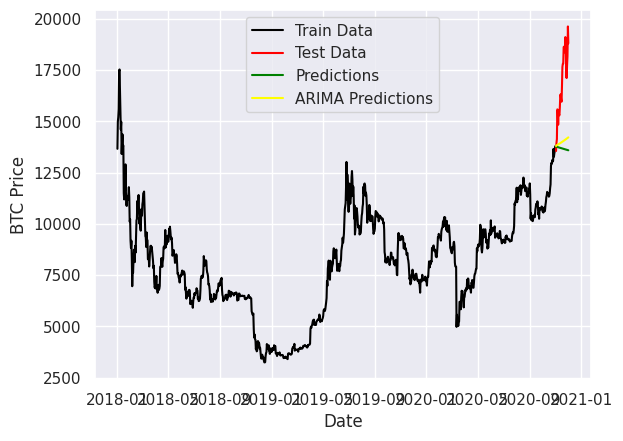

In [191]:
ARIMAmodel=ARIMA(y,order=(2,3,2))
ARIMAmodel=ARIMAmodel.fit()
y_pred= ARIMAmodel.get_forecast(len(test.index))
y_pred_df=y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"]=ARIMAmodel.predict(start = y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index=test.index
y_pred_out2=y_pred_df["Predictions"]
plt.plot(train.index, train['BTC-USD'], color="black", label="Train Data")
plt.plot(test.index, test['BTC-USD'], color="red", label="Test Data")
plt.plot(y_pred_out, color="green", label="Predictions")
plt.plot(y_pred_out2, color="Yellow", label='ARIMA Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


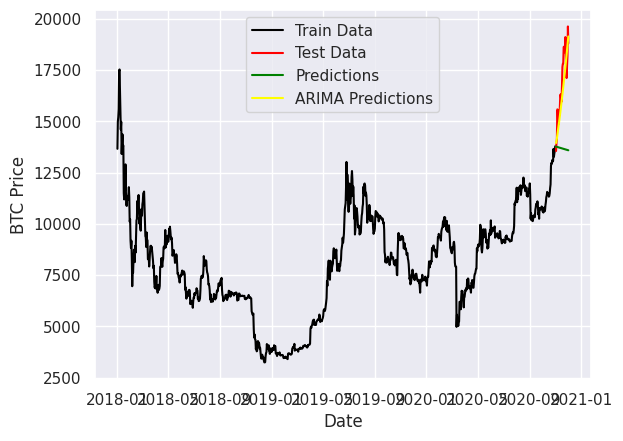

In [192]:
ARIMAmodel=ARIMA(y,order=(5,4,2))
ARIMAmodel=ARIMAmodel.fit()

y_pred= ARIMAmodel.get_forecast(len(test.index))
y_pred_df=y_pred.conf_int(alpha=0.05)

y_pred_df["Predictions"]=ARIMAmodel.predict(start = y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index=test.index

y_pred_out3=y_pred_df["Predictions"]


plt.plot(train.index, train['BTC-USD'], color="black", label="Train Data")
plt.plot(test.index, test['BTC-USD'], color="red", label="Test Data")
plt.plot(y_pred_out, color="green", label="Predictions")
plt.plot(y_pred_out3, color="Yellow", label='ARIMA Predictions')

plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.legend()

plt.show()

Seasonal ARIMA

In [200]:
SARIMAXmodel = SARIMAX(y,order =(5,4,2), seasonal_order=(2,2,2,12))
SARIMAXmodel= SARIMAXmodel.fit()

y_pred= SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"]= SARIMAXmodel.predict(start = y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index= test.index

y_pred_out4= y_pred_df["Predictions"]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


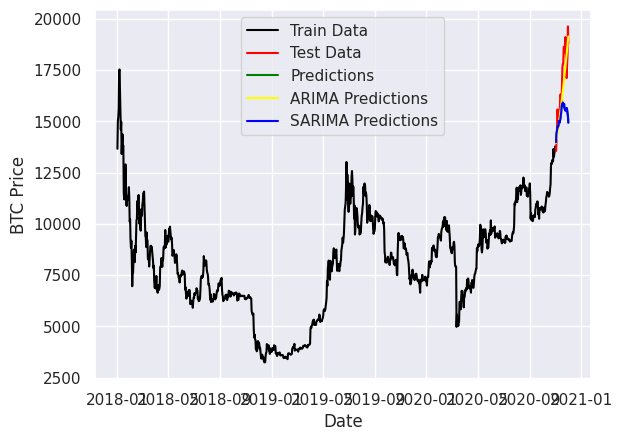

In [201]:
plt.plot(train.index, train['BTC-USD'], color="black", label="Train Data")
plt.plot(test.index, test['BTC-USD'], color="red", label="Test Data")
plt.plot(y_pred_out, color="green", label="Predictions")
plt.plot(y_pred_out3, color="Yellow", label='ARIMA Predictions')
plt.plot(y_pred_out4, color='Blue', label = 'SARIMA Predictions')

plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.legend()

plt.show()